In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("data/Cleaned_BA_reviews.csv")

In [5]:
df = df.reset_index(drop = True)

In [6]:
df

,Unnamed: 0,reviews,stars,date,country,Verified,corpus
0,0,✅ Trip Verified | A short BA euro trip and thi...,5,2023-03-09,United Kingdom,True,short ba euro trip ba excel clean aircraft goo...
1,1,Not Verified | We are flying Business class f...,8,2023-03-08,United States,False,verified flying business class flight premium ...
2,2,✅ Trip Verified | I am in Australia and on Fr...,1,2023-03-06,Australia,True,australia friday night went online book flight...
3,3,✅ Trip Verified | At 7.54 am on the day of tr...,1,2023-03-04,United Kingdom,True,day travel whilst driving london heathrow rece...
4,4,✅ Trip Verified | Would happily fly them agai...,2,2023-03-02,United States,True,would happily fly personal emergency allowed r...
...,...,...,...,...,...,...,...
3476,3483,LHR-JFK-LAX-LHR. Check in was ok apart from be...,7,2012-08-29,United Kingdom,False,lhr jfk lax lhr check ok apart snapped early c...
3477,3484,LHR to HAM. Purser addresses all club passenge...,1,2012-08-28,United Kingdom,False,lhr ham purser address club passenger name boa...
3478,3485,My son who had worked for British Airways urge...,10,2011-10-12,United Kingdom,False,son worked british airway urged fly british ai...
3479,3486,London City-New York JFK via Shannon on A318 b...,8,2011-10-11,United States,False,london city new york jfk via shannon really ni...


In [7]:
del df["Unnamed: 0"]

In [8]:
df

,reviews,stars,date,country,Verified,corpus
0,✅ Trip Verified | A short BA euro trip and thi...,5,2023-03-09,United Kingdom,True,short ba euro trip ba excel clean aircraft goo...
1,Not Verified | We are flying Business class f...,8,2023-03-08,United States,False,verified flying business class flight premium ...
2,✅ Trip Verified | I am in Australia and on Fr...,1,2023-03-06,Australia,True,australia friday night went online book flight...
3,✅ Trip Verified | At 7.54 am on the day of tr...,1,2023-03-04,United Kingdom,True,day travel whilst driving london heathrow rece...
4,✅ Trip Verified | Would happily fly them agai...,2,2023-03-02,United States,True,would happily fly personal emergency allowed r...
...,...,...,...,...,...,...
3476,LHR-JFK-LAX-LHR. Check in was ok apart from be...,7,2012-08-29,United Kingdom,False,lhr jfk lax lhr check ok apart snapped early c...
3477,LHR to HAM. Purser addresses all club passenge...,1,2012-08-28,United Kingdom,False,lhr ham purser address club passenger name boa...
3478,My son who had worked for British Airways urge...,10,2011-10-12,United Kingdom,False,son worked british airway urged fly british ai...
3479,London City-New York JFK via Shannon on A318 b...,8,2011-10-11,United States,False,london city new york jfk via shannon really ni...


In [10]:
df.stars.value_counts()

1     756
2     392
3     384
8     352
10    313
7     303
9     301
5     260
4     234
6     186
Name: stars, dtype: int64

In [15]:
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

Average overall rating?

In [16]:
df.stars.mean()

4.831944843435794

What is the total counts for each ratings?

Text(0.5, 0.98, 'Counts for each ratings')

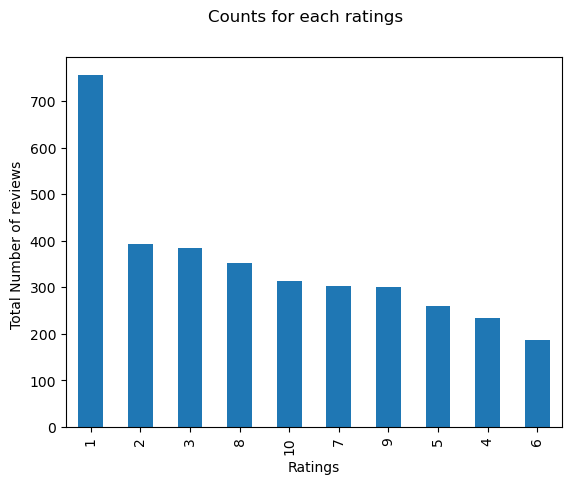

In [52]:
df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews ")
plt.suptitle("Counts for each ratings")

In [53]:
df.stars.value_counts()

1     756
2     392
3     384
8     352
10    313
7     303
9     301
5     260
4     234
6     186
Name: stars, dtype: int64

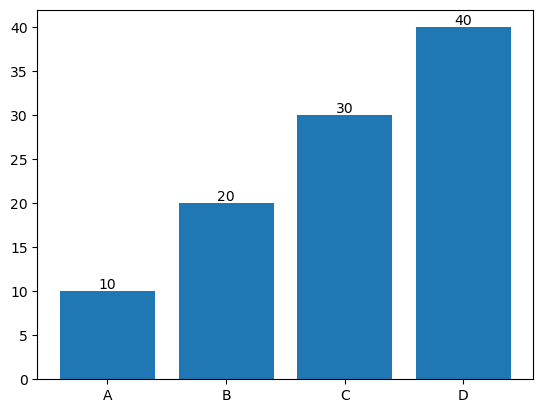

In [18]:
x = df.stars.value_counts()
y = [10, 20, 30, 40]

# Create a bar plot
fig, ax = plt.subplots()
ax.bar(x, y)

# Add the bar values to the plot
for i, v in enumerate(y):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Show the plot
plt.show()

In [27]:
x = pd.DataFrame(df.stars.value_counts())

In [28]:
x

,stars
1,756
2,392
3,384
8,352
10,313
7,303
9,301
5,260
4,234
6,186


In [31]:
df.stars.unique()

array([ 5,  8,  1,  2, 10,  4,  6,  7,  9,  3], dtype=int64)

Which country most review comes from?

Text(0.5, 0.98, 'Maximum number of review by country')

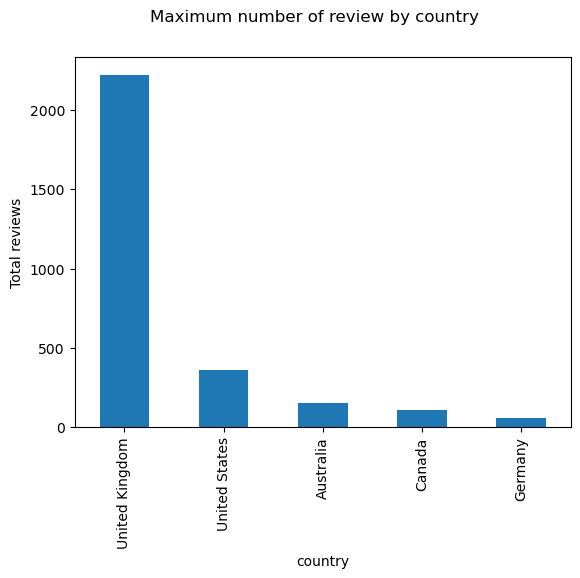

In [34]:
df.country.value_counts().head().plot(kind="bar")
plt.xlabel("country")
plt.ylabel("Total reviews")
plt.suptitle("Maximum number of review by country")

In [51]:
df.country.value_counts().head()

United Kingdom    2220
United States      363
Australia          150
Canada             108
Germany             59
Name: country, dtype: int64

Which country provided on average highest ratings?

Text(0.5, 0.98, 'Top 12 Countries with avg highest rating provided to British Airways')

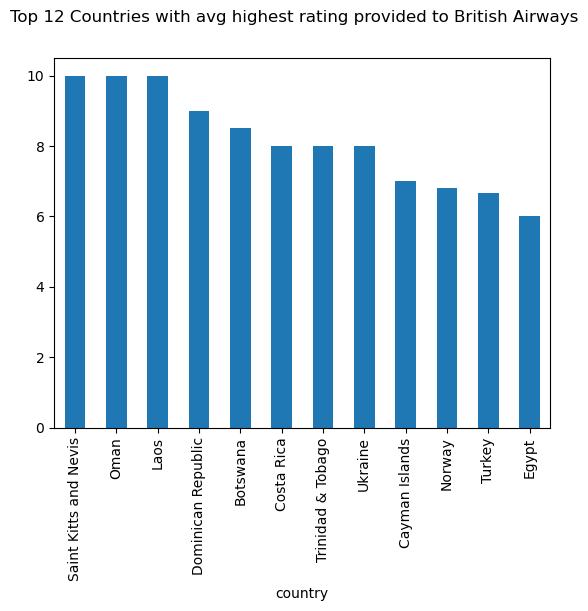

In [38]:
df.groupby('country').mean()['stars'].sort_values(ascending=False)[:12].plot(kind="bar")
plt.suptitle("Top 12 Countries with avg highest rating provided to British Airways")

In [49]:
df.groupby('country').mean()['stars'].sort_values(ascending=False)[:12]

country
Saint Kitts and Nevis    10.000000
Oman                     10.000000
Laos                     10.000000
Dominican Republic        9.000000
Botswana                  8.500000
Costa Rica                8.000000
Trinidad & Tobago         8.000000
Ukraine                   8.000000
Cayman Islands            7.000000
Norway                    6.800000
Turkey                    6.666667
Egypt                     6.000000
Name: stars, dtype: float64

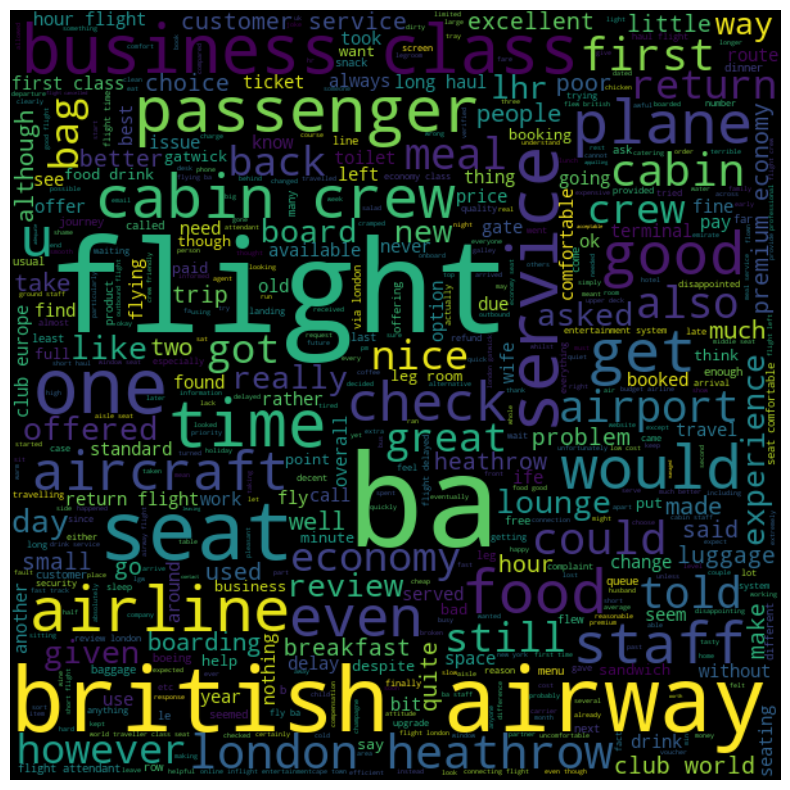

In [42]:
import nltk
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [43]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words

words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'food'),
  Text(3, 0, 'time'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'good'),
  Text(6, 0, 'cabin'),
  Text(7, 0, 'class'),
  Text(8, 0, 'hour'),
  Text(9, 0, 'business'),
  Text(10, 0, 'staff'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'meal'),
  Text(15, 0, 'return'),
  Text(16, 0, 'lounge'),
  Text(17, 0, 'club'),
  Text(18, 0, 'boarding'),
  Text(19, 0, 'experience')])

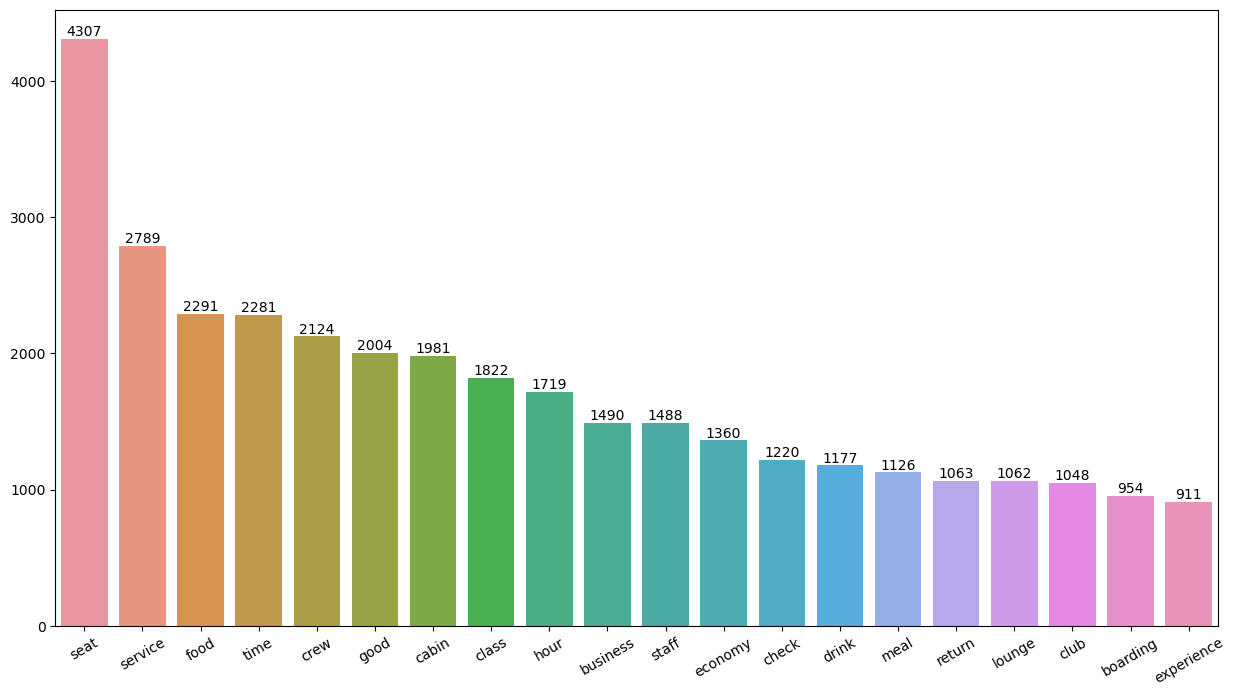

In [41]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)